In [1]:
#https://medium.com/analytics-vidhya/text-preprocessing-for-nlp-natural-language-processing-beginners-to-master-fd82dfecf95
#https://github.com/EnesGokceDS/Amazon_Reviews_NLP_Capstone_Project/blob/master/1_Data_cleaning_and_feature_extraction.ipynb

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

!pip install -q wordcloud
import wordcloud
import string

from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import pandas as pd
import numpy as np

import re
from bs4 import BeautifulSoup

import unicodedata

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Talkt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Talkt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Talkt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Talkt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
list_texts = pd.read_csv('datasets\dataFinal1.csv',sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)
print(list_texts.columns)
list_texts.shape

Index(['Unnamed: 0', 'Content'], dtype='object')


(530, 2)

In [4]:
list_texts['Content'].isna().sum()
list_texts.dropna(inplace=True)

In [5]:
list_texts

,Unnamed: 0,Content
0,164,In this section: \n
1,165,Diabetes is a disease that occurs when your bl...
2,166,"Over time, having too much glucose in your blo..."
3,167,Sometimes people call diabetes “a touch of sug...
4,168,"The most common types of diabetes are type 1, ..."
...,...,...
525,2317,What Is Type 1 Diabetes?
526,2323,\nPeople of all ages can develop type 1 diabet...
527,2331,If your child has type 1 diabetes—especially a...
528,2333,Learn More\nType 1 Diabetes Resources and Supp...


## Basic Feature Extraction - 1

Normally, I tried to make data cleaning first. Then, I realized that while making data cleaning, I am losing some of characters that can help data cleaning. Therefore, there will be two part of feature extraction. Here, I will extract features that can't be exracted after data cleaning.

#### 1) Number of stopwords

In [6]:
list_texts['stopwords'] = list_texts['Content'].apply(lambda x: len([x for x in x.split() if x in stop]))
list_texts[['Content','stopwords']].head()

,Content,stopwords
0,In this section: \n,1
1,Diabetes is a disease that occurs when your bl...,30
2,"Over time, having too much glucose in your blo...",12
3,Sometimes people call diabetes “a touch of sug...,10
4,"The most common types of diabetes are type 1, ...",4


### 2) Number of Punctuation

In [7]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

list_texts['punctuation'] = list_texts['Content'].apply(lambda x: count_punct(x))

In [8]:
list_texts[['Content','punctuation']].head()

,Content,punctuation
0,In this section: \n,1
1,Diabetes is a disease that occurs when your bl...,9
2,"Over time, having too much glucose in your blo...",4
3,Sometimes people call diabetes “a touch of sug...,3
4,"The most common types of diabetes are type 1, ...",3


### 3) Number of hashtag characters
One more interesting feature which we can extract from a review is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.


In [9]:
list_texts['hastags'] = list_texts['Content'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
list_texts[['Content','hastags']].head()

,Content,hastags
0,In this section: \n,0
1,Diabetes is a disease that occurs when your bl...,0
2,"Over time, having too much glucose in your blo...",0
3,Sometimes people call diabetes “a touch of sug...,0
4,"The most common types of diabetes are type 1, ...",0


### 4) Number of numerics
Calculate the number of numerics which are present in the text can be useful. At least, it doesn't hurt to have such a data!

In [10]:
list_texts['numerics'] = list_texts['Content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
list_texts[['Content','numerics']].head()

,Content,numerics
0,In this section: \n,0
1,Diabetes is a disease that occurs when your bl...,0
2,"Over time, having too much glucose in your blo...",0
3,Sometimes people call diabetes “a touch of sug...,0
4,"The most common types of diabetes are type 1, ...",0


### 5) Number of Uppercase words
Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.

In [11]:
list_texts['upper'] = list_texts['Content'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
list_texts[['Content','upper']].head()

,Content,upper
0,In this section: \n,0
1,Diabetes is a disease that occurs when your bl...,0
2,"Over time, having too much glucose in your blo...",0
3,Sometimes people call diabetes “a touch of sug...,0
4,"The most common types of diabetes are type 1, ...",0


### 6) Number of Stop words


In [12]:
list_texts['stopwords'] = list_texts['Content'].apply(lambda x: len([x for x in x.split() if x in stop]))
list_texts[['Content','stopwords']].head()

,Content,stopwords
0,In this section: \n,1
1,Diabetes is a disease that occurs when your bl...,30
2,"Over time, having too much glucose in your blo...",12
3,Sometimes people call diabetes “a touch of sug...,10
4,"The most common types of diabetes are type 1, ...",4


## Text cleaning techniques
Make all text lower case
The first pre-processing step which we will do is transform our reviews into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [13]:
list_texts['cleanContent'] = list_texts['Content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
list_texts[['cleanContent']].head()

,cleanContent
0,in this section:
1,diabetes is a disease that occurs when your bl...
2,"over time, having too much glucose in your blo..."
3,sometimes people call diabetes “a touch of sug...
4,"the most common types of diabetes are type 1, ..."


### Removing Punctuation

In [14]:
list_texts['cleanContent'] = list_texts['cleanContent'].str.replace('[^\w\s]','')
list_texts['cleanContent'].head()

0                                      in this section
1    diabetes is a disease that occurs when your bl...
2    over time having too much glucose in your bloo...
3    sometimes people call diabetes a touch of suga...
4    the most common types of diabetes are type 1 t...
Name: cleanContent, dtype: object

### Removal of URL

In [15]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [16]:
# remove all html tags from df
list_texts['cleanContent'] = list_texts['cleanContent'].apply(lambda x: remove_url(x))
list_texts['cleanContent'].sample(10)

491                            mikes prediabetes journey
352      wondering about a headlinegrabbing drug read on
430    page last reviewed april 23 2021 content sourc...
45     diabetes overview what is diabetes type 1 diab...
224                                  the food groups are
302           misgendering what it is and why it matters
270    strength training is a light or moderate physi...
206    the niddk has funded several important studies...
190    this device sends a fine spray of insulin into...
16     home health information diabetes diabetes over...
Name: cleanContent, dtype: object

### Remove html tags

In [17]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [18]:
list_texts['cleanContent'] = list_texts['cleanContent'].apply(remove_html)
list_texts['cleanContent'].head()

0                                      in this section
1    diabetes is a disease that occurs when your bl...
2    over time having too much glucose in your bloo...
3    sometimes people call diabetes a touch of suga...
4    the most common types of diabetes are type 1 t...
Name: cleanContent, dtype: object

In [55]:
def replace(string,text,x):
    return string.replace(text,x)

In [68]:
list_texts['cleanContent'] = list_texts['cleanContent'].apply(lambda x: replace(x,'type 1', 'type1'))
list_texts['cleanContent']

0                                                section
1      diabetes disease occurs blood glucose also cal...
2      time much glucose blood cause health problems ...
3      sometimes people call diabetes touch sugar bor...
4      common types diabetes type type gestational di...
                             ...                        
525                                        type diabetes
526    people ages develop type diabetes type diabete...
527    child type diabetesespecially young childyoull...
528    learn type diabetes resources support jdrfexte...
529    type diabetes resources support jdrfexternal i...
Name: cleanContent, Length: 530, dtype: object

### Removing Emojis
Emojis can be indictor of some emotions that can be related to being customer satisfaction. Unfortunately, we need to remove the emojis in our text analysis

In [57]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [58]:
#Example
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [59]:
# remove all emojis from df
list_texts['cleanContent']  = list_texts['cleanContent'] .apply(lambda x: remove_emoji(x))
list_texts['cleanContent'].sample(10)

294    happened website using security service protec...
203     approved type artificial pancreas system call...
426                                diabetes risk factors
363    research health conditions check symptoms prep...
349                                 misgendering matters
374    account customer service order online learning...
175                                                 page
196    side effects problems result medicine diabetes...
266    sitting long time working desk watching light ...
405    diabetesespañol spanish minus related pages di...
Name: cleanContent, dtype: object

### Remove Emoticons
In previous steps, we have removed emoji. Now, going to remove emoticons.

What is the difference between emoji and emoticons?

:-) is an emoticon
😜 → emoji.

In [60]:
#!pip install emot

In [61]:
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [62]:
#Example
remove_emoticons("Hello :-)")

'Hello '

In [63]:
list_texts['cleanContent'] = list_texts['cleanContent'].apply(lambda x: remove_emoticons(x))
list_texts['cleanContent'].sample(10)

92       experts recommend routine testing type diabetes
229    drink water instead sweetened beverages consid...
247    addition using plate method carb counting want...
84     previous risk factors type diabetes next diabe...
243    carbohydrate counting involves keeping track a...
220    becoming active making changes drink seem chal...
449    health care provider irregular monthly periods...
341    vegan paleo pluses minuses watch postpartum an...
118    home health information diabetes diabetes over...
49                       next risk factors type diabetes
Name: cleanContent, dtype: object

###  word cloud

In [64]:
textWordCloud = []
textWordCloud.append(list_texts['Content'])
textWordCloud

[0                                  In this section:   \n
 1      Diabetes is a disease that occurs when your bl...
 2      Over time, having too much glucose in your blo...
 3      Sometimes people call diabetes “a touch of sug...
 4      The most common types of diabetes are type 1, ...
                              ...                        
 525                             What Is Type 1 Diabetes?
 526    \nPeople of all ages can develop type 1 diabet...
 527    If your child has type 1 diabetes—especially a...
 528    Learn More\nType 1 Diabetes Resources and Supp...
 529    \nType 1 Diabetes Resources and Support from J...
 Name: Content, Length: 530, dtype: object]

In [65]:
# It will extract all words from every tweets and will put it into seperate list
def get_words_in_textWordCloud(textWordCloud):
    all = []
    for (cleanContent) in textWordCloud:
        all.extend(cleanContent)
    # extracted all the words only    
    return all

# Note that, we are not using this frequency of word occurance anywhere, So it will just return the unique word list. 
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

In [66]:
all_words_in_textWordCloud = get_words_in_textWordCloud(textWordCloud)

w_features = get_word_features(all_words_in_textWordCloud)

#w_features

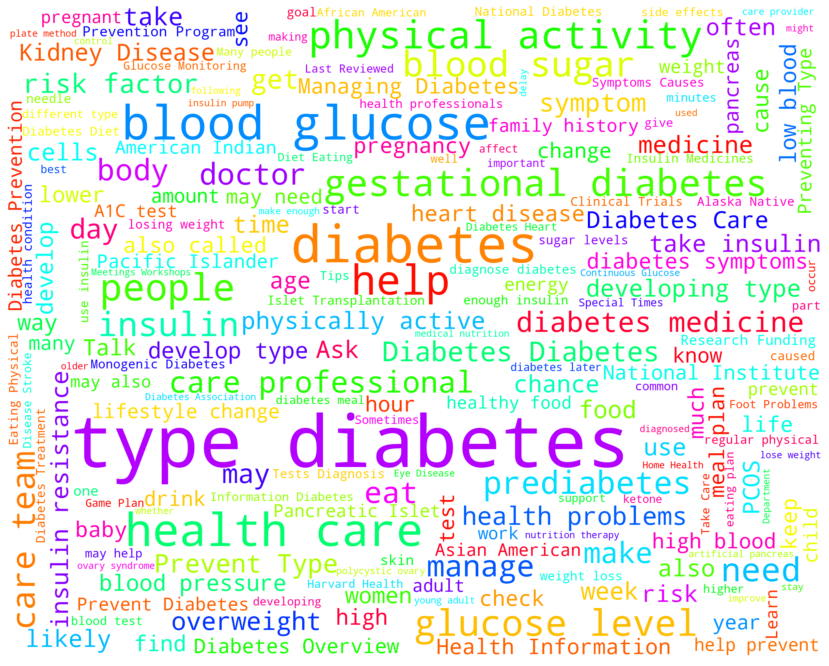

In [67]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      max_font_size=220,colormap="hsv",
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(figsize=(16,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

wordcloud_draw(w_features)

In [30]:
#Word cloud for the all reviews
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text_for_cloud = " ".join(x for x in w_features)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 511125 words in the combination of all reviews.


In [31]:
def clean_tokenization(review_text):
    words = nltk.word_tokenize(sentence)
    without_stop_words = [word for word in words if not word in stop_words]
    return(without_stop_words)

### tokenization

In [32]:
def clean_tokenization(review_text):
    return word_tokenize(review_text)


list_texts['cleanContent'] = list_texts['cleanContent'].apply(clean_tokenization)
list_texts['cleanContent'].head(5)

0                                  [in, this, section]
1    [diabetes, is, a, disease, that, occurs, when,...
2    [over, time, having, too, much, glucose, in, y...
3    [sometimes, people, call, diabetes, a, touch, ...
4    [the, most, common, types, of, diabetes, are, ...
Name: cleanContent, dtype: object

### Removal of Stop Words

In [33]:
def clean_stopwords(review_text):
    return [word for word in review_text if not word in stop]

list_texts['cleanContent'] = list_texts['cleanContent'].apply(clean_stopwords)
list_texts['cleanContent'].sample(10)

316    [best, diets, cognitive, fitness, absolutely, ...
100    [health, care, professional, report, a1c, test...
178    [type, 1, diabetes, must, take, insulin, body,...
131    [two, kinds, cholesterol, blood, ldl, hdl, ldl...
162    [depression, common, among, people, chronic, l...
373    [account, customer, service, log, order, onlin...
81     [home, health, information, diabetes, diabetes...
237    [diabetes, overweight, obese, planning, baby, ...
69     [often, best, chance, preventing, type, 2, dia...
472    [page, last, reviewed, april, 27, 2021, conten...
Name: cleanContent, dtype: object

In [34]:
def clean_clean_length(review_text):
    return [i for i in review_text if len(i) > 3]

list_texts['cleanContent'] = list_texts['cleanContent'].apply(clean_clean_length)
list_texts

,Unnamed: 0,Content,stopwords,punctuation,hastags,numerics,upper,cleanContent
0,164,In this section: \n,1,1,0,0,0,[section]
1,165,Diabetes is a disease that occurs when your bl...,30,9,0,0,0,"[diabetes, disease, occurs, blood, glucose, al..."
2,166,"Over time, having too much glucose in your blo...",12,4,0,0,0,"[time, much, glucose, blood, cause, health, pr..."
3,167,Sometimes people call diabetes “a touch of sug...,10,3,0,0,0,"[sometimes, people, call, diabetes, touch, sug..."
4,168,"The most common types of diabetes are type 1, ...",4,3,0,0,0,"[common, types, diabetes, type, type, gestatio..."
...,...,...,...,...,...,...,...,...
525,2317,What Is Type 1 Diabetes?,0,1,0,1,0,"[type, diabetes]"
526,2323,\nPeople of all ages can develop type 1 diabet...,471,144,0,30,7,"[people, ages, develop, type, diabetes, type, ..."
527,2331,If your child has type 1 diabetes—especially a...,36,10,0,2,1,"[child, type, diabetesespecially, young, child..."
528,2333,Learn More\nType 1 Diabetes Resources and Supp...,4,0,0,4,0,"[learn, type, diabetes, resources, support, jd..."


In [35]:
def convert_to_string(listReview):
    return ' '.join(listReview)

list_texts['cleanContent'] = list_texts['cleanContent'].apply(convert_to_string)
list_texts

,Unnamed: 0,Content,stopwords,punctuation,hastags,numerics,upper,cleanContent
0,164,In this section: \n,1,1,0,0,0,section
1,165,Diabetes is a disease that occurs when your bl...,30,9,0,0,0,diabetes disease occurs blood glucose also cal...
2,166,"Over time, having too much glucose in your blo...",12,4,0,0,0,time much glucose blood cause health problems ...
3,167,Sometimes people call diabetes “a touch of sug...,10,3,0,0,0,sometimes people call diabetes touch sugar bor...
4,168,"The most common types of diabetes are type 1, ...",4,3,0,0,0,common types diabetes type type gestational di...
...,...,...,...,...,...,...,...,...
525,2317,What Is Type 1 Diabetes?,0,1,0,1,0,type diabetes
526,2323,\nPeople of all ages can develop type 1 diabet...,471,144,0,30,7,people ages develop type diabetes type diabete...
527,2331,If your child has type 1 diabetes—especially a...,36,10,0,2,1,child type diabetesespecially young childyoull...
528,2333,Learn More\nType 1 Diabetes Resources and Supp...,4,0,0,4,0,learn type diabetes resources support jdrfexte...


### Spell Correction
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

To achieve this we will use the textblob library.

In [36]:
from textblob import TextBlob
list_texts['cleanContent'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                              section
1    diabetes disease occurs blood glucose also cal...
2    time much glucose blood cause health problems ...
3    sometimes people call diabetes touch sugar bor...
4    common types diabetes type type gestational di...
Name: cleanContent, dtype: object

In [37]:
# We could do some of the cleaning steps as a sum of opreation like this:

# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [38]:
list_texts['cleanContent'] = list_texts['cleanContent'].apply(round1)
list_texts['cleanContent']

0                                                section
1      diabetes disease occurs blood glucose also cal...
2      time much glucose blood cause health problems ...
3      sometimes people call diabetes touch sugar bor...
4      common types diabetes type type gestational di...
                             ...                        
525                                        type diabetes
526    people ages develop type diabetes type diabete...
527    child type diabetesespecially young childyoull...
528    learn type diabetes resources support jdrfexte...
529    type diabetes resources support jdrfexternal i...
Name: cleanContent, Length: 530, dtype: object

In [39]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [40]:
list_texts['cleanContent'] = list_texts['cleanContent'].apply(round2)
list_texts['cleanContent']

0                                                section
1      diabetes disease occurs blood glucose also cal...
2      time much glucose blood cause health problems ...
3      sometimes people call diabetes touch sugar bor...
4      common types diabetes type type gestational di...
                             ...                        
525                                        type diabetes
526    people ages develop type diabetes type diabete...
527    child type diabetesespecially young childyoull...
528    learn type diabetes resources support jdrfexte...
529    type diabetes resources support jdrfexternal i...
Name: cleanContent, Length: 530, dtype: object

## Basic Feature Extraction - 2

### 1) Number of Words


In [41]:
list_texts['word_count'] = list_texts['cleanContent'].apply(lambda x: len(str(x).split(" ")))
list_texts[['cleanContent','word_count']].head()

,cleanContent,word_count
0,section,1
1,diabetes disease occurs blood glucose also cal...,42
2,time much glucose blood cause health problems ...,16
3,sometimes people call diabetes touch sugar bor...,21
4,common types diabetes type type gestational di...,7


Again, let's check the data and number of null values

In [42]:
null_values=list_texts.isna().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
sum_tot=len(list_texts)
null_values['percent']=null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
Unnamed: 0,0,0.0
Content,0,0.0
stopwords,0,0.0
punctuation,0,0.0
hastags,0,0.0
numerics,0,0.0
upper,0,0.0
cleanContent,0,0.0
word_count,0,0.0


### 2) Number of characters

In [43]:
list_texts['char_count'] = list_texts['cleanContent'].str.len()
list_texts[['cleanContent','char_count']].head()

,cleanContent,char_count
0,section,7
1,diabetes disease occurs blood glucose also cal...,283
2,time much glucose blood cause health problems ...,108
3,sometimes people call diabetes touch sugar bor...,153
4,common types diabetes type type gestational di...,52


### 3) Average Word Length

In [46]:
def avg_word(sentence):
    text = sentence
    length_words = 1
    total_words = 1
    words = text.split( )
    
    for x in words:
        length_words += len(x)
        total_words += 1
    
    average = length_words / total_words 
    return average

In [47]:
list_texts['avg_word'] = list_texts['cleanContent'].apply(lambda x: avg_word(x)).round(1)
list_texts[['cleanContent','avg_word']].head()

,cleanContent,avg_word
0,section,4.0
1,diabetes disease occurs blood glucose also cal...,5.7
2,time much glucose blood cause health problems ...,5.5
3,sometimes people call diabetes touch sugar bor...,6.1
4,common types diabetes type type gestational di...,5.9


### 4) frequency of words

In [48]:
word_features = list_texts[['cleanContent']]
freq = pd.Series(' '.join(w_features).split()).value_counts()
freq.head(25)

diabetes    3515
and         2186
your        2166
you         2040
to          1983
the         1879
of          1637
a           1433
type        1324
or          1101
for         1099
health       955
blood        899
2            847
have         835
is           809
can          800
with         785
if           761
insulin      735
in           732
glucose      669
are          662
care         572
1            508
dtype: int64

### Word frequency distribution:

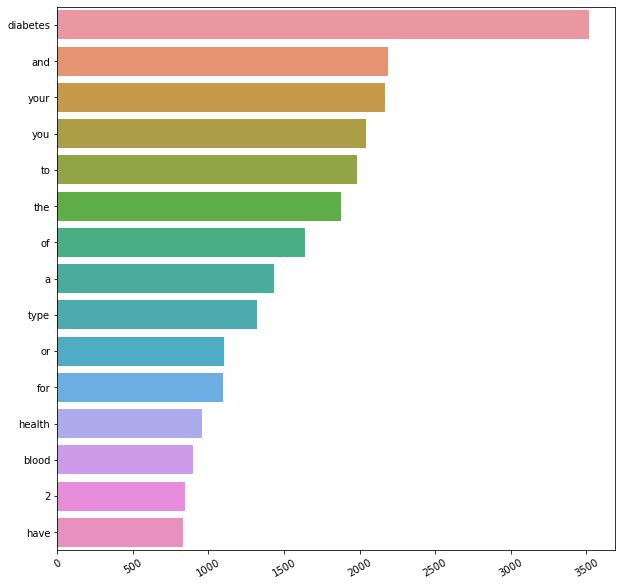

In [49]:
import seaborn as sns

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(freq.head(15)))
all_fdist

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(y=all_fdist.index, x=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

### 5) Getting bigrams 

In [69]:
list_text = []
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(list_texts['cleanContent'])  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
print("\n\nFeatures : \n", features) 
df1 = pd.DataFrame(X1.toarray(), columns=vectorizer.get_feature_names())
print(df1)



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Features : 
 ['abcs diabetes', 'abcs doctor', 'abcs follow', 'abcs help', 'abcs knowing', 'abdomen confusion', 'able help', 'able make', 'able move', 'able prevent', 'able produce', 'absolutely free', 'acanthosis nigricans', 'acanthosis nigricansdark', 'access denied', 'access harvard', 'access health', 'access library', 'access resource', 'accessed august', 'accessed january', 'accessed june', 'accessibility disclaimers', 'according recent', 'account customer', 'accurate doctor', 'accurate people', 'acid stomach', 'acne hair', 'acne thinning', 'acromegaly occurs', 'action factors', 'action health', 'active controlling', 'active days', 'active diabetes', 'active family', 'active follow', 'active gestational', 'active health', 'active help', 'active history', 'active hypoglycemia', 'active ketones', 'active less', 'active make', 'active making', 'active mana

In [70]:
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (2, 2)) 
X2 = vectorizer.fit_transform(list_texts['cleanContent']) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 



Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [71]:
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words_bigrams = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words_bigrams.head(7)) 



Words : 
                       term       rank
6013         type diabetes  33.970076
502          blood glucose  12.927320
2471           health care  12.073282
4326     physical activity  10.011074
2265  gestational diabetes   8.756148
510            blood sugar   8.566485
1327     diabetes diabetes   7.542512


### 6) Getting trigrams 

In [72]:
# Getting trigrams  
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(list_texts['cleanContent'] )  
features = (vectorizer.get_feature_names()) 
print("\n\nFeatures : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 



Features : 
 ['abcs diabetes care', 'abcs doctor need', 'abcs follow diabetes', 'abcs help manage', 'abcs knowing diabetes', 'abdomen confusion feeling', 'able help prevent', 'able make insulin', 'able move around', 'able prevent delay', 'able prevent gestational', 'able produce insulin', 'absolutely free sign', 'acanthosis nigricans gynecologist', 'acanthosis nigricansdark thick', 'access denied happened', 'access harvard health', 'access health news', 'access library archived', 'accessed august last', 'accessed august types', 'accessed january yardley', 'accessed june department', 'accessibility disclaimers copyright', 'according recent diabetes', 'account customer service', 'accurate doctor thinks', 'accurate people anemia', 'acid stomach would', 'acne hair growth', 'acne thinning scalp', 'acromegaly occurs body', 'action factors change', 'action health diabetes', 'active controlling blood', 'active days week', 'active diabetes physical', 'active diabetes physically', 'active diab

In [73]:
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(list_texts['cleanContent'] ) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 




Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [74]:
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words_trigrams = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words_trigrams.head(7)) 



Words head : 
                                term      rank
3260               health care team  7.668724
3280    health information diabetes  5.210020
3788  information diabetes diabetes  5.057344
3548        home health information  5.057344
1724     diabetes diabetes overview  5.057344
1610       developing type diabetes  4.839965
1598          develop type diabetes  4.707609


### 7) Getting fourgrams 

In [75]:
# Getting fourgrams  
vectorizer = CountVectorizer(ngram_range = (4,4)) 
X3 = vectorizer.fit_transform(list_texts['cleanContent'] )  
features = (vectorizer.get_feature_names()) 
print("\n\nFeatures : \n", features) 
print("\n\nX1 : \n", X3.toarray()) 



Features : 
 ['abcs diabetes care record', 'abcs doctor need take', 'abcs follow diabetes meal', 'abcs help manage blood', 'abcs knowing diabetes abcs', 'abdomen confusion feeling tired', 'able help prevent talk', 'able make insulin common', 'able move around easily', 'able prevent delay diabetes', 'able prevent gestational diabetes', 'able produce insulin resulting', 'absolutely free sign receive', 'acanthosis nigricans gynecologist doctor', 'acanthosis nigricansdark thick velvety', 'access denied happened website', 'access harvard health online', 'access health news information', 'access library archived content', 'accessed august last reviewed', 'accessed august types insulin', 'accessed january yardley sigal', 'accessed june department health', 'accessibility disclaimers copyright site', 'according recent diabetes statistics', 'account customer service order', 'accurate doctor thinks type', 'accurate people anemia youre', 'acid stomach would destroy', 'acne hair growth darkening'

In [76]:
# Getting top ranking features 
sums = X3.sum(axis = 0) 
data2 = [] 
for col, term in enumerate(features): 
    data2.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data2, columns = ['term','rank']) 
words_fourgrams = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words_fourgrams.head(7)) 



Words head : 
                                        term  rank
8438            type diabetes type diabetes    80
7034             risk factors type diabetes    70
4841           likely develop type diabetes    53
4374  insulin medicines diabetes treatments    41
2354            diabetes type diabetes type    40
1223        chance developing type diabetes    39
2454          diet eating physical activity    36


In [77]:
weights_grams = pd.DataFrame({'trigrams':  words_trigrams['term'], 'fourgrams':  words_fourgrams['term']})

In [78]:
weights_grams

,trigrams,fourgrams
0,abcs diabetes care,abcs diabetes care record
1,abcs doctor need,abcs doctor need take
2,abcs follow diabetes,abcs follow diabetes meal
3,abcs help manage,abcs help manage blood
4,abcs knowing diabetes,abcs knowing diabetes abcs
...,...,...
8978,NaN,youre woman trouble getting
8979,NaN,youtube account customer service
8980,NaN,youtube instagram turning discovery
8981,NaN,youve gestational diabetes greater


In [79]:
weights_grams.dropna(subset = ["trigrams"], inplace=True)

In [80]:
weights_grams

,trigrams,fourgrams
0,abcs diabetes care,abcs diabetes care record
1,abcs doctor need,abcs doctor need take
2,abcs follow diabetes,abcs follow diabetes meal
3,abcs help manage,abcs help manage blood
4,abcs knowing diabetes,abcs knowing diabetes abcs
...,...,...
8197,youre woman trouble,treat human immunodeficiency virus
8198,youtube account customer,treat hypoglycemia happens blood
8199,youtube instagram turning,treat inflammatory illnesses rheumatoid
8200,youve gestational diabetes,treat needed diabetes education


In [81]:
weights_grams['test'] = [x[0] in x[1] for x in zip(weights_grams['trigrams'], weights_grams['fourgrams'])]
print (weights_grams)

                        trigrams                                fourgrams  \
0             abcs diabetes care                abcs diabetes care record   
1               abcs doctor need                    abcs doctor need take   
2           abcs follow diabetes                abcs follow diabetes meal   
3               abcs help manage                   abcs help manage blood   
4          abcs knowing diabetes               abcs knowing diabetes abcs   
...                          ...                                      ...   
8197         youre woman trouble       treat human immunodeficiency virus   
8198    youtube account customer         treat hypoglycemia happens blood   
8199   youtube instagram turning  treat inflammatory illnesses rheumatoid   
8200  youve gestational diabetes          treat needed diabetes education   
8201          youve gotten blood              treat type diabetes besides   

       test  
0      True  
1      True  
2      True  
3      True  
4    

In [82]:
weights_grams.head()

,trigrams,fourgrams,test
0,abcs diabetes care,abcs diabetes care record,True
1,abcs doctor need,abcs doctor need take,True
2,abcs follow diabetes,abcs follow diabetes meal,True
3,abcs help manage,abcs help manage blood,True
4,abcs knowing diabetes,abcs knowing diabetes abcs,True


In [83]:
rating = []
for ind in weights_grams.index: 
    row = weights_grams['test'][ind]
    if row == 'True':
        rating.append(weights_grams['trigrams'])
    else:
        rating.append(weights_grams['fourgrams'])


In [84]:
weights_grams['Content'] = rating[0]

In [85]:
weights_grams

,trigrams,fourgrams,test,Content
0,abcs diabetes care,abcs diabetes care record,True,abcs diabetes care record
1,abcs doctor need,abcs doctor need take,True,abcs doctor need take
2,abcs follow diabetes,abcs follow diabetes meal,True,abcs follow diabetes meal
3,abcs help manage,abcs help manage blood,True,abcs help manage blood
4,abcs knowing diabetes,abcs knowing diabetes abcs,True,abcs knowing diabetes abcs
...,...,...,...,...
8197,youre woman trouble,treat human immunodeficiency virus,False,treat human immunodeficiency virus
8198,youtube account customer,treat hypoglycemia happens blood,False,treat hypoglycemia happens blood
8199,youtube instagram turning,treat inflammatory illnesses rheumatoid,False,treat inflammatory illnesses rheumatoid
8200,youve gestational diabetes,treat needed diabetes education,False,treat needed diabetes education


In [86]:
weights_grams['Content'].to_csv('datasets\dataFinal2.csv')